In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv("Online Retail - Online Retail.csv")

In [5]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom


In [7]:
df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [9]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [11]:
df.shape

(541909, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [19]:
df.describe().style.background_gradient(cmap='bone_r')

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
missing = df.isnull().sum()

missing[missing > 0].sort_values(ascending=False).head()

CustomerID     135080
Description      1454
dtype: int64

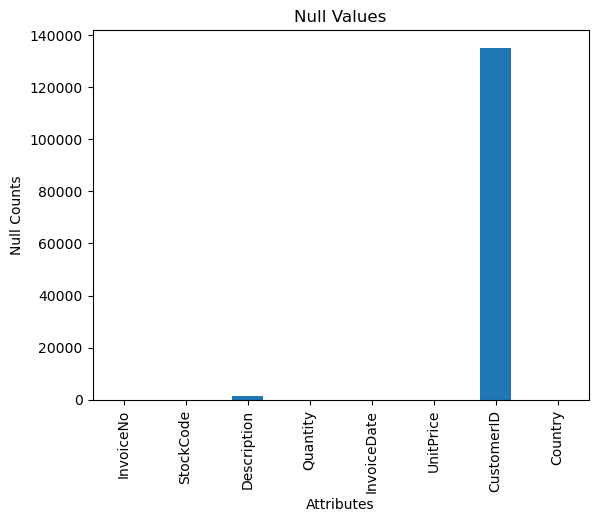

In [25]:
df.isnull().sum().plot(kind='bar')
plt.title("Null Values")
plt.xlabel("Attributes")
plt.ylabel("Null Counts")
plt.show()

In [43]:
# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Compute Total Revenue per transaction
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# Aggregate data per customer
customer_data = df.groupby('CustomerID').agg(
    TotalRevenue=('TotalRevenue', 'sum'),  # Total spending per customer
    NumPurchases=('InvoiceNo', 'nunique'),  # Unique number of invoices per customer
    AvgRevenuePerTxn=('TotalRevenue', 'mean'),  # Revenue per transaction
    LastPurchase=('InvoiceDate', 'max')  # Most recent purchase date
).reset_index()

# Compute Recency (days since last purchase)
max_date = df['InvoiceDate'].max()
customer_data['Recency'] = (max_date - customer_data['LastPurchase']).dt.days

# Drop LastPurchase column as it's no longer needed
customer_data = customer_data.drop(columns=['LastPurchase'])

# Display the cleaned customer data
customer_data.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10652\361176098.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,CustomerID,TotalRevenue,NumPurchases,AvgRevenuePerTxn,Recency
0,12346.0,0.00,2,0.000000,325
1,12347.0,4310.00,7,23.681319,1
2,12348.0,1797.24,4,57.975484,74
3,12349.0,1757.55,1,24.076027,18
4,12350.0,334.40,1,19.670588,309


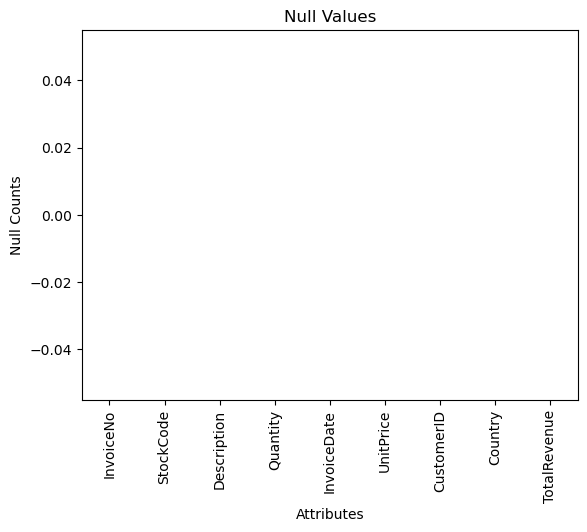

In [47]:
#after remove missing values
df.isnull().sum().plot(kind='bar')
plt.title("Null Values")
plt.xlabel("Attributes")
plt.ylabel("Null Counts")
plt.show()

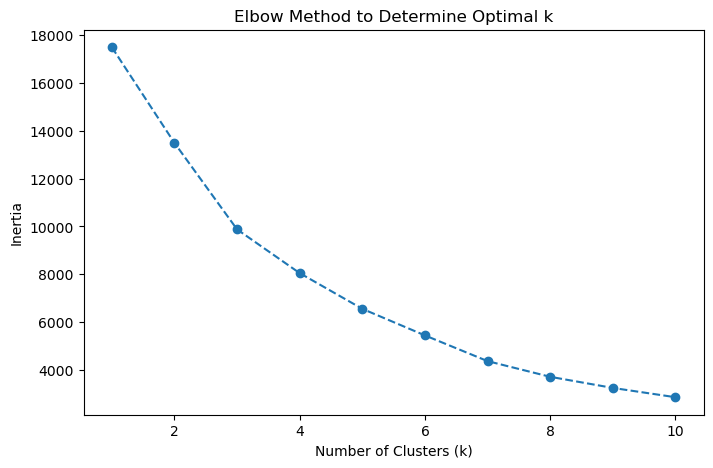

In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['TotalRevenue', 'NumPurchases', 'AvgRevenuePerTxn', 'Recency']

# Normalize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


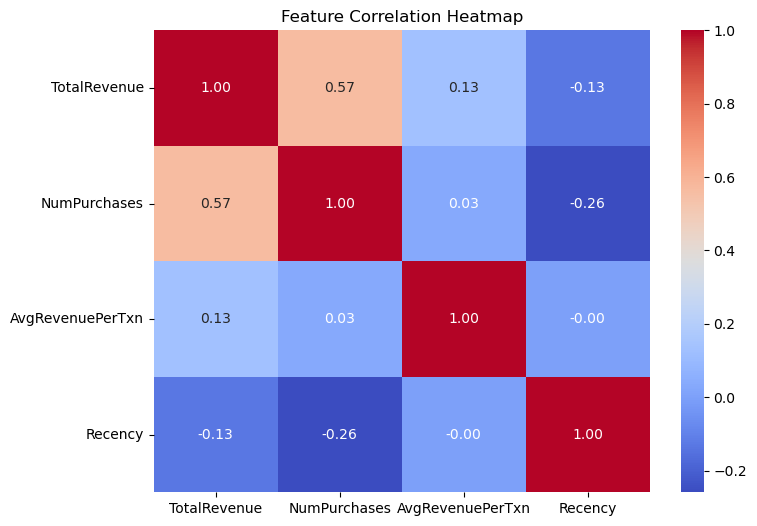

In [51]:
import seaborn as sns

corr = customer_data[['TotalRevenue', 'NumPurchases', 'AvgRevenuePerTxn', 'Recency']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
